## 1. 데이터 시각화가 필요한 이유

In [ ]:
# 데이터를 그림으로 그려봐야 알 수 있음. 수치들과 상관관계, 회귀선이 같다고해도 그래프로 그리면 다름!

In [1]:
print('< anscombe 데이터 불러오기 >')
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe) # dataset을 통해 구분되어있음
print(type(anscombe))
print('------------------------------------------------------------------------------------------------')

< anscombe 데이터 불러오기 >
   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0  

< dataset = I인 경우의 그래프(기본=선) >


<IPython.core.display.Javascript object>


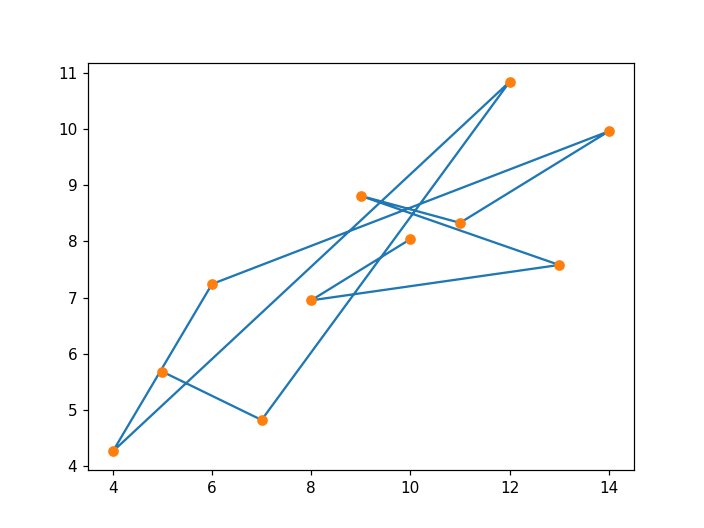

------------------------------------------------------------------------------------------------
< dataset = I인 경우의 그래프(점) >
------------------------------------------------------------------------------------------------


In [2]:
# 그래프 그릴 준비
%matplotlib notebook
import matplotlib.pyplot as plt

print('< dataset = I인 경우의 그래프(기본=선) >')
dataset_1 = anscombe[anscombe['dataset'] == 'I']  # dataset이 I인 경우
plt.plot(dataset_1['x'], dataset_1['y'])  # plot메서드는 기본적으로 선으로 그래프를 그림
print('------------------------------------------------------------------------------------------------')

print('< dataset = I인 경우의 그래프(점) >')
dataset_1 = anscombe[anscombe['dataset'] == 'I']  # dataset이 I인 경우
plt.plot(dataset_1['x'], dataset_1['y'], 'o')
print('------------------------------------------------------------------------------------------------')

<IPython.core.display.Javascript object>


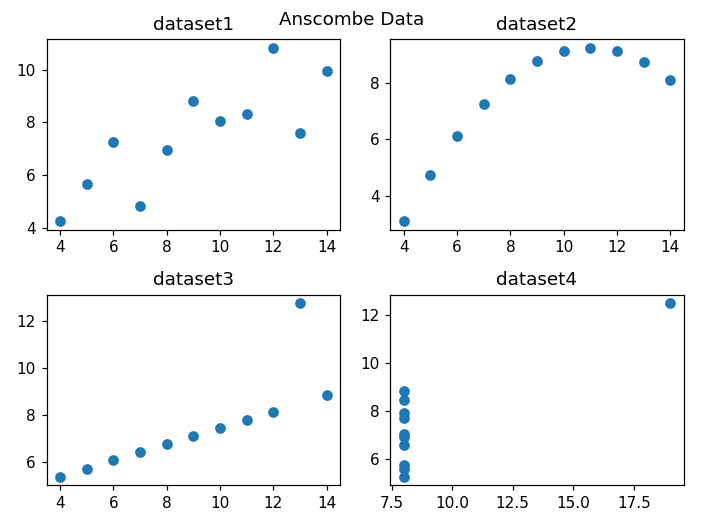

In [3]:
# 4개 그래프 한번에 그리기

# dataset에 따라 구분
dataset1 = anscombe[anscombe['dataset'] == 'I']
dataset2 = anscombe[anscombe['dataset'] == 'II']
dataset3 = anscombe[anscombe['dataset'] == 'III']
dataset4 = anscombe[anscombe['dataset'] == 'IV']

# 그래프 격자가 위치할 기본 틀
fig = plt.figure()

# 그래프 격자 그리기
axes1 = fig.add_subplot(2, 2, 1)  # (한 행에 몇개 그래프가 들어갈 것인지, 한 열에 몇개 그래프가 들어갈 것인지, 위치)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# 그래프 그리기
axes1.plot(dataset1['x'], dataset1['y'], 'o')
axes2.plot(dataset2['x'], dataset2['y'], 'o')
axes3.plot(dataset3['x'], dataset3['y'], 'o')
axes4.plot(dataset4['x'], dataset4['y'], 'o')

# 그래프 격자에 제목 추가
axes1.set_title("dataset1")
axes2.set_title("dataset2")
axes3.set_title("dataset3")
axes4.set_title("dataset4")

# 기본 틀에 제목 추가
fig.suptitle('Anscombe Data')

# 각 그래프의 레이아웃 조절
fig.tight_layout()

## 2. matplotlib 이용해 그래프 그리기

### 2-1. 기초그래프 그리기

In [4]:
print('< tips 데이터 불러오기 >')
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))
print('------------------------------------------------------------------------------------------------')

< tips 데이터 불러오기 >
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
------------------------------------------------------------------------------------------------


In [ ]:
# 일변량 그래프: 변수를 하나만 사용해서 그린 그래프(ex. 히스토그램)
# 이변랑 그래프: 변수 2개를 사용하는 그래프(ex. 산점도)
# 박스그래프: 이산형 변수(명확한 구분 ex.성별) + 연속형 변수(명확하게 셀 수 없는 범위의 값)

< 히스토그램 그리기 >


<IPython.core.display.Javascript object>


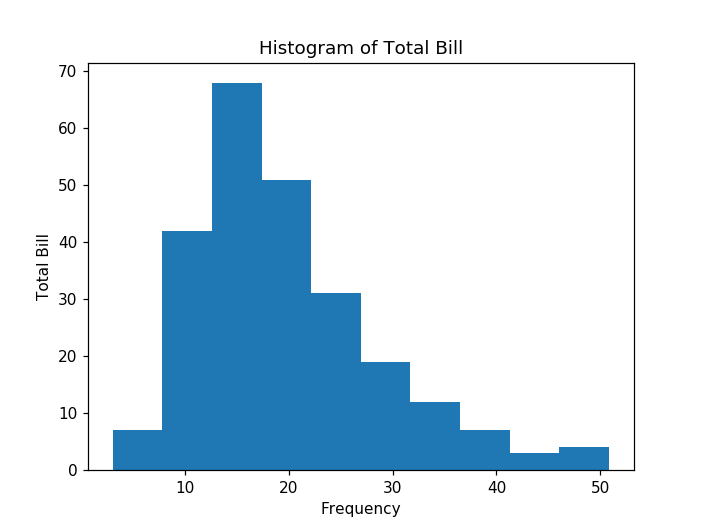

------------------------------------------------------------------------------------------------
< 산점도 그리기 >


<IPython.core.display.Javascript object>


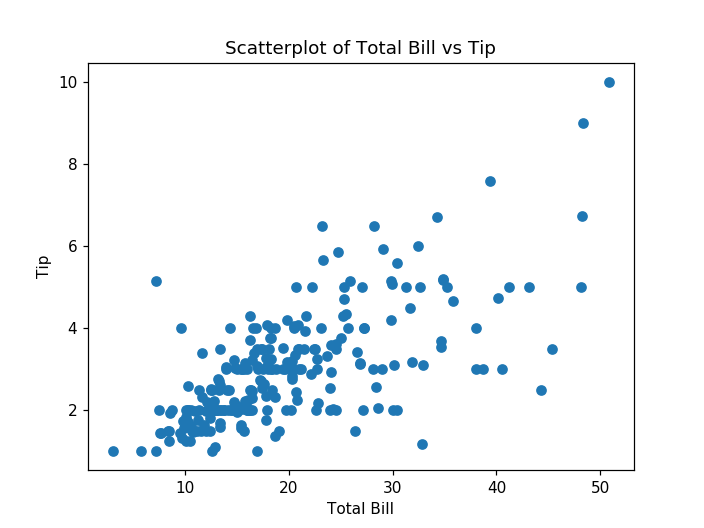

------------------------------------------------------------------------------------------------
< 박스그래프 그리기 >


<IPython.core.display.Javascript object>


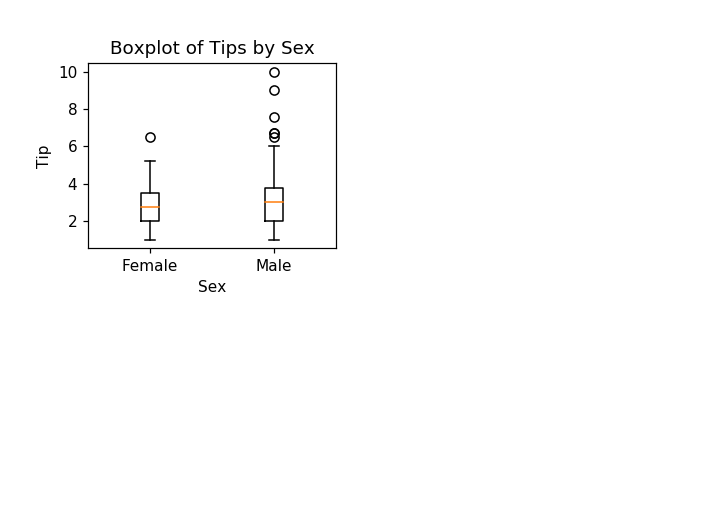

------------------------------------------------------------------------------------------------


In [5]:
print('< 히스토그램 그리기 >')
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10)  # bins: x축 간격
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')
print('------------------------------------------------------------------------------------------------')

print('< 산점도 그리기 >')
scatter_plot = plt.figure()
axes2 = scatter_plot.add_subplot(1, 1, 1)
axes2.scatter(tips['total_bill'], tips['tip'])
axes2.set_title('Scatterplot of Total Bill vs Tip')
axes2.set_xlabel('Total Bill')
axes2.set_ylabel('Tip')
print('------------------------------------------------------------------------------------------------')

print('< 박스그래프 그리기 >')
boxplot = plt.figure()
axes3 = boxplot.add_subplot(2, 2, 1)
axes3.boxplot([tips[tips['sex'] == 'Female']['tip'],  # Female의 tip
               tips[tips['sex'] == 'Male']['tip']],  # Male의 tip
              labels=['Female', 'Male'])  # 이산형변수를 []안에 작성하고 이산형 변수 label작성
axes3.set_title('Boxplot of Tips by Sex')
axes3.set_xlabel('Sex')
axes3.set_ylabel('Tip')
print('------------------------------------------------------------------------------------------------')

### 2-2. 다변량 그래프 그리기

< 산점도 + 셩별 그래프 그리기(다변량 그래프) >


<IPython.core.display.Javascript object>


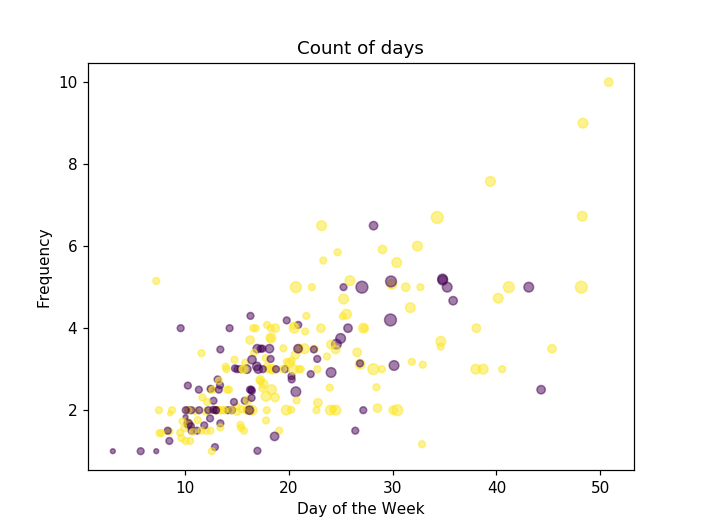

------------------------------------------------------------------------------------------------


In [6]:
# 3개 이상 변수를 사용

print('< 산점도 + 셩별 그래프 그리기(다변량 그래프) >')
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
# recode_sex 함수를 브로드캐스팅하기 위함
# datetime 형태로 바꿀 때는 born_datetime = pd.datetime(born, format='%Y-%m-%d')
tips['sex_color'] = tips['sex'].apply(recode_sex)  # sex_color추가
# print(tips.head())
scatter_plot = plt.figure()
axes4 = scatter_plot.add_subplot(1, 1, 1)
axes4.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,  # 사이즈 * 10으로 크기 나타냄
    c = tips['sex_color'],
    alpha=0.5)
axes4.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes4.set_xlabel('Total Bill')
axes4.set_ylabel('Tip')
print('------------------------------------------------------------------------------------------------')

## 3. seaborn 이용해 그래프 그리기

### 3-1. 단변량 그래프 그리기

In [ ]:
# 단변량 그래프: 히스토그램+밀집도, 빈도수
# 이변량 그래프: 산점도, 회귀선, 밀집도, bar, box, violine, 관계

------------------------------------------------------------------------------------------------
< 히스토그램+밀집도 그리기 >


<IPython.core.display.Javascript object>


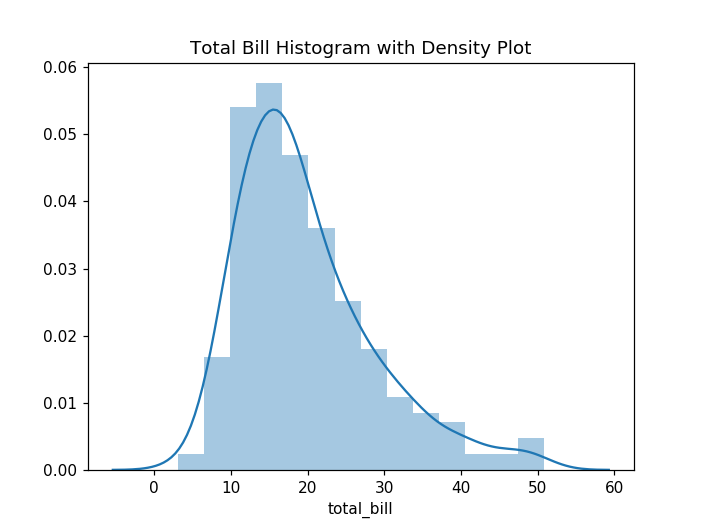

------------------------------------------------------------------------------------------------
< count그래프 그리기: 이산값 나타냄 >


<IPython.core.display.Javascript object>


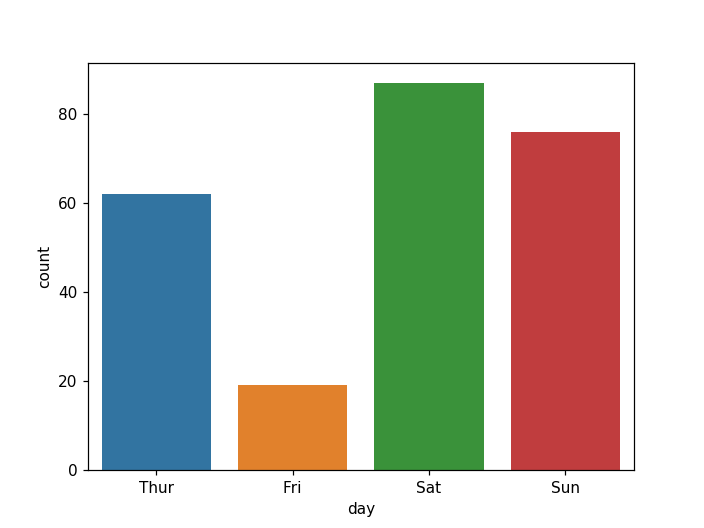

------------------------------------------------------------------------------------------------


In [8]:
# < tips 데이터 불러오기 >
import seaborn as sns

tips = sns.load_dataset("tips")
print('------------------------------------------------------------------------------------------------')

print('< 히스토그램+밀집도 그리기 >')
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])  # 열데이터
# 히스토그램 빼고싶으면, hist=False, 밀집도를 빼고싶으면 kde=False
# 양탄자 그래프 추가하고싶으면, rug=True
ax.set_title('Total Bill Histogram with Density Plot')
print('------------------------------------------------------------------------------------------------')

print('< count그래프 그리기: 이산값 나타냄 >')
ax2 = plt.subplots()
ax2 = sns.countplot('day', data=tips)
axes4.set_title('Count of days')
axes4.set_xlabel('Day of the Week')
axes4.set_ylabel('Frequency')
print('------------------------------------------------------------------------------------------------')

### 3-2. 이변량 그래프 그리기

< 회귀선 + 산점도 그리기 >


<IPython.core.display.Javascript object>


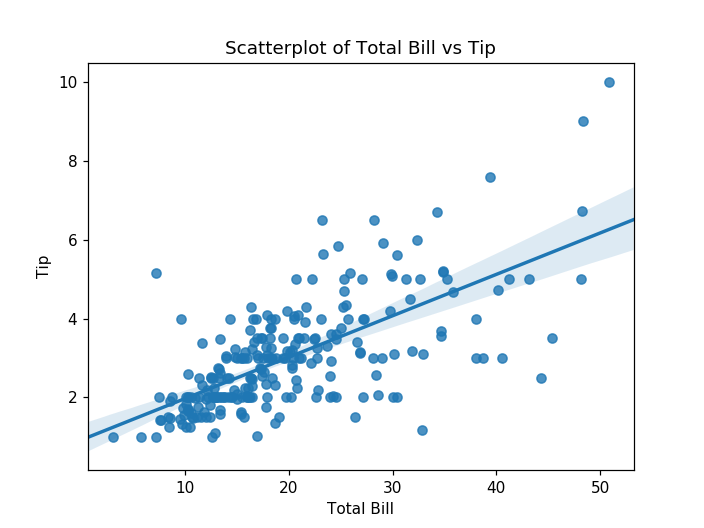

------------------------------------------------------------------------------------------------
< 회귀선 + 산점도 그리기: 회귀선 제거 >


<IPython.core.display.Javascript object>


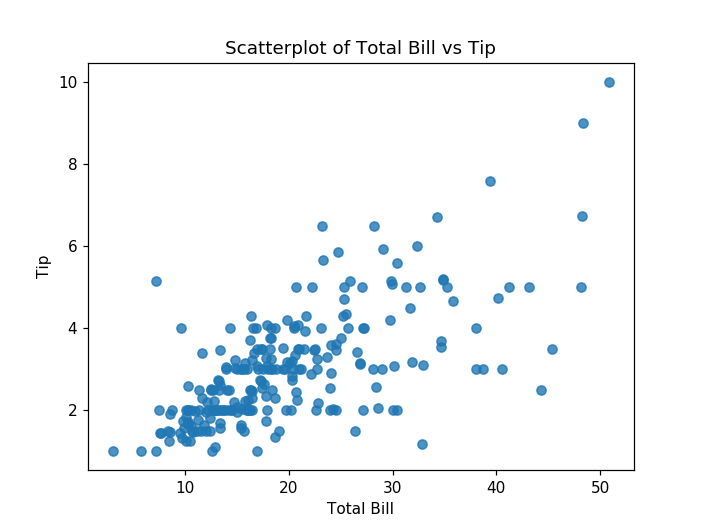

------------------------------------------------------------------------------------------------
< 히스토그램 + 산점도 그리기 >


<IPython.core.display.Javascript object>


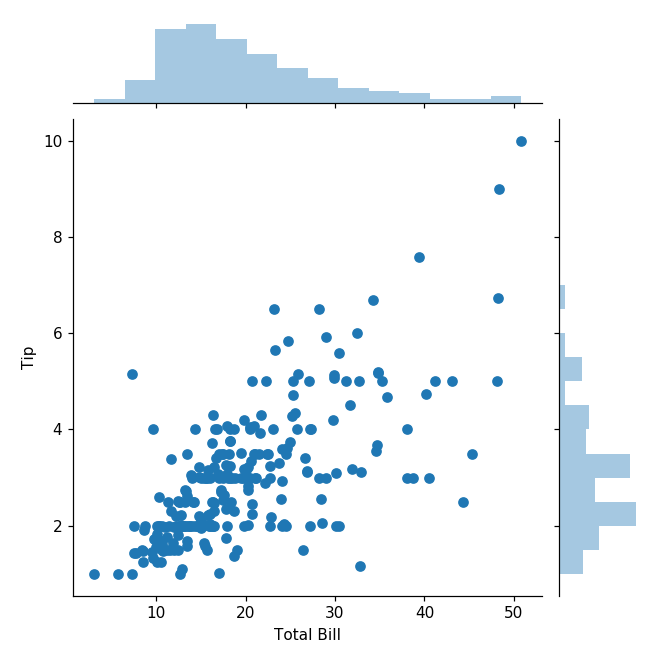

------------------------------------------------------------------------------------------------
< 히스토그램 + 산점도 그리기: 육각그래프 >


<IPython.core.display.Javascript object>


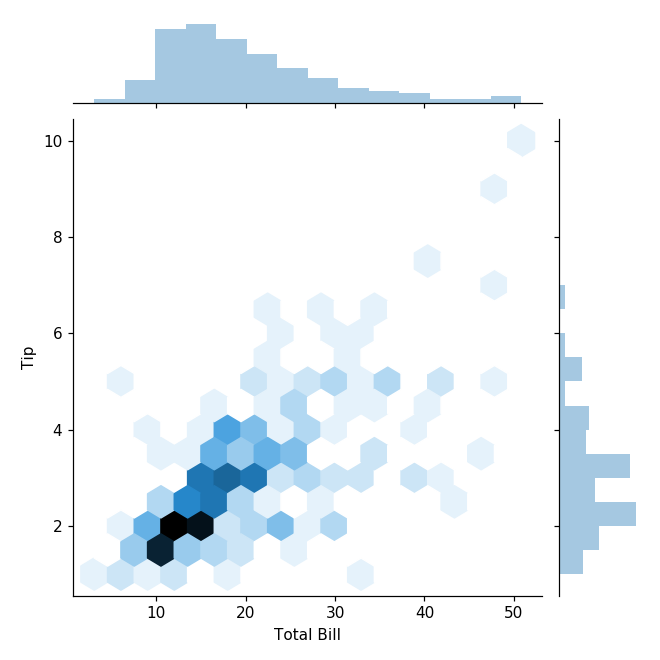

------------------------------------------------------------------------------------------------
< 이차원 밀집도 그리기 >


<IPython.core.display.Javascript object>


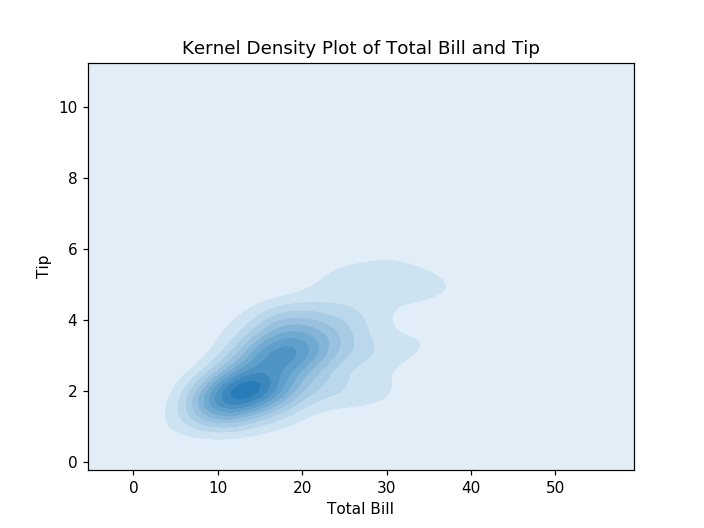

------------------------------------------------------------------------------------------------
< 바 그래프 그리기 >


<IPython.core.display.Javascript object>


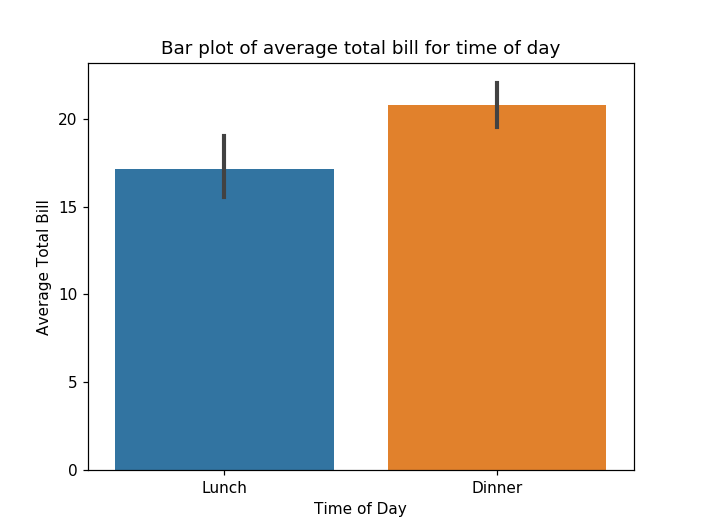

------------------------------------------------------------------------------------------------
< 박스 그래프 그리기 >


<IPython.core.display.Javascript object>


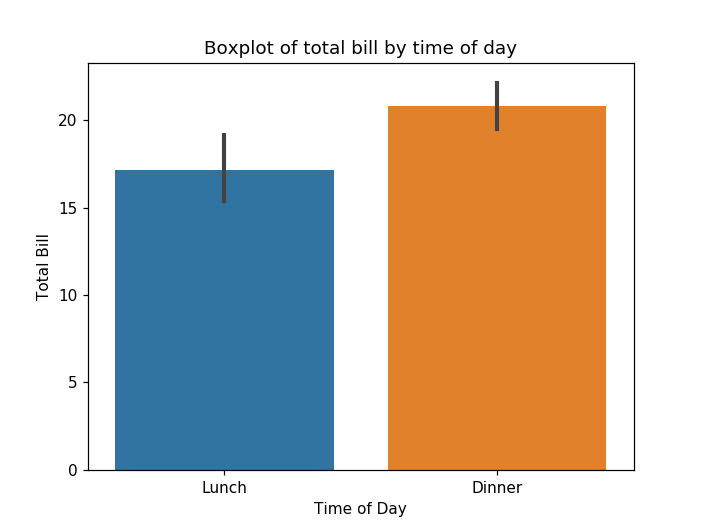

------------------------------------------------------------------------------------------------
< 바이올린 그래프 그리기 >


<IPython.core.display.Javascript object>


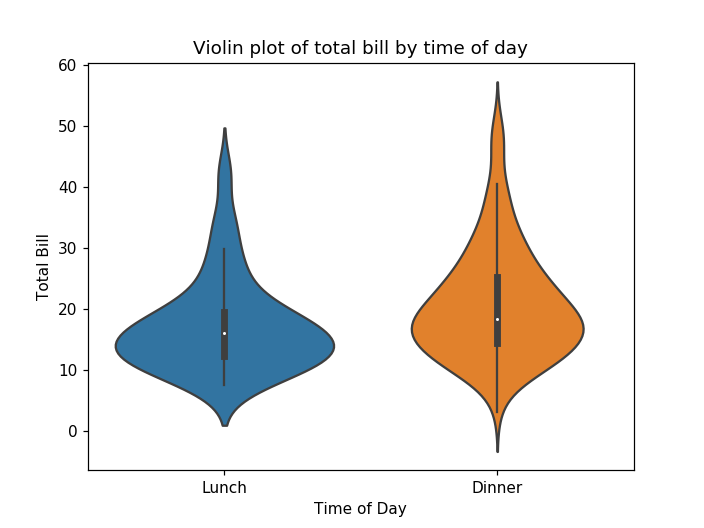

------------------------------------------------------------------------------------------------
< 관계그래프 그리기 >


<IPython.core.display.Javascript object>


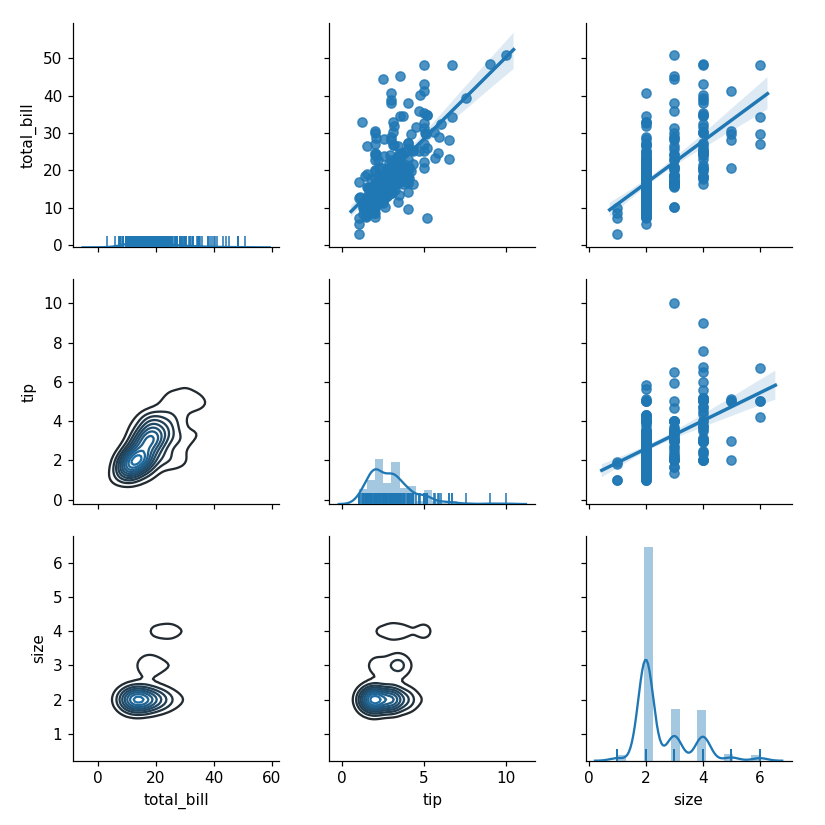

------------------------------------------------------------------------------------------------


In [17]:
print('< 회귀선 + 산점도 그리기 >')
ax11 = plt.subplots()
ax11 = sns.regplot(x='total_bill', y='tip', data=tips)
ax11.set_title('Scatterplot of Total Bill vs Tip')
ax11.set_xlabel('Total Bill')
ax11.set_ylabel('Tip')
print('------------------------------------------------------------------------------------------------')

print('< 회귀선 + 산점도 그리기: 회귀선 제거 >')
ax12 = plt.subplots()
ax12 = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax12.set_title('Scatterplot of Total Bill vs Tip')
ax12.set_xlabel('Total Bill')
ax12.set_ylabel('Tip')
print('------------------------------------------------------------------------------------------------')

print('< 히스토그램 + 산점도 그리기 >')
joint13 = sns.jointplot(x='total_bill', y='tip', data=tips)
joint13.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint13.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
print('------------------------------------------------------------------------------------------------')

print('< 히스토그램 + 산점도 그리기: 육각그래프 >')
joint14 = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
joint14.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint14.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)
print('------------------------------------------------------------------------------------------------')

print('< 이차원 밀집도 그리기 >')
ax15 = plt.subplots()
ax15 = sns.kdeplot(
        data=tips['total_bill'],
        data2=tips['tip'],
        shade=True)  # 음영효과
ax15.set_title('Kernel Density Plot of Total Bill and Tip')
ax15.set_xlabel('Total Bill')
ax15.set_ylabel('Tip')
print('------------------------------------------------------------------------------------------------')

print('< 바 그래프 그리기 >')
ax16 = plt.subplots()
ax16 = sns.barplot(x='time', y='total_bill', data=tips)
ax16.set_title('Bar plot of average total bill for time of day')
ax16.set_xlabel('Time of Day')
ax16.set_ylabel('Average Total Bill')
print('------------------------------------------------------------------------------------------------')

print('< 박스 그래프 그리기 >')
ax17 = plt.subplots()
ax17 = sns.barplot(x='time', y='total_bill', data=tips)
ax17.set_title('Boxplot of total bill by time of day')
ax17.set_xlabel('Time of Day')
ax17.set_ylabel('Total Bill')
print('------------------------------------------------------------------------------------------------')

print('< 바이올린 그래프 그리기 >')
ax18 = plt.subplots()
ax18 = sns.violinplot(x='time', y='total_bill', data=tips)
ax18.set_title('Violin plot of total bill by time of day')
ax18.set_xlabel('Time of Day')
ax18.set_ylabel('Total Bill')
print('------------------------------------------------------------------------------------------------')

print('< 관계그래프 그리기 >')
pair_grid=sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()
print('------------------------------------------------------------------------------------------------')


### 3-3. 다변량 그래프 그리기

## 4. 데이터프레임과 시리즈로 그래프 그리기

< 시리즈로 히스토그램 그리기 >


<IPython.core.display.Javascript object>


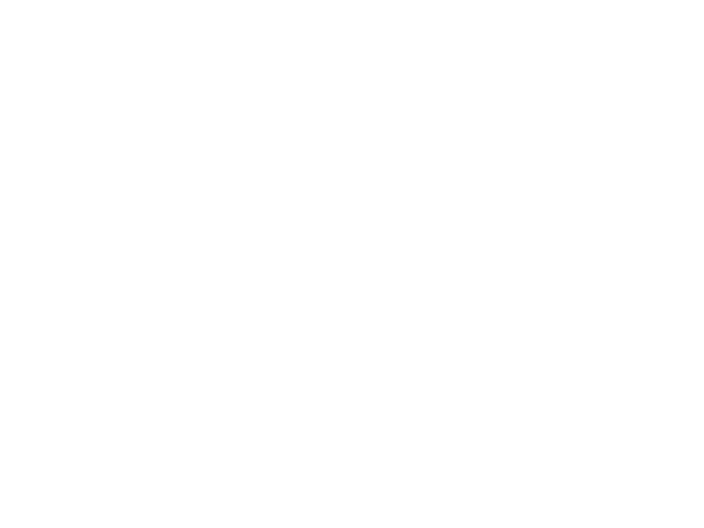

------------------------------------------------------------------------------------------------
< 2개의 시리즈로 히스토그램 그리기 >


<IPython.core.display.Javascript object>


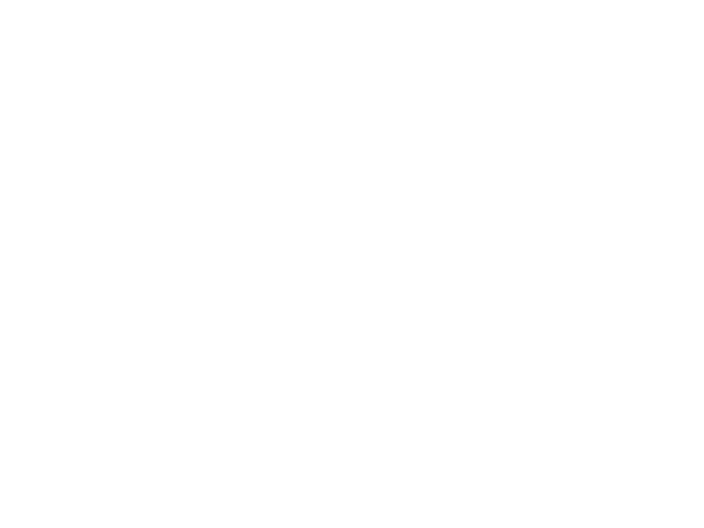

------------------------------------------------------------------------------------------------
< 밀집도 그리기 >


<IPython.core.display.Javascript object>


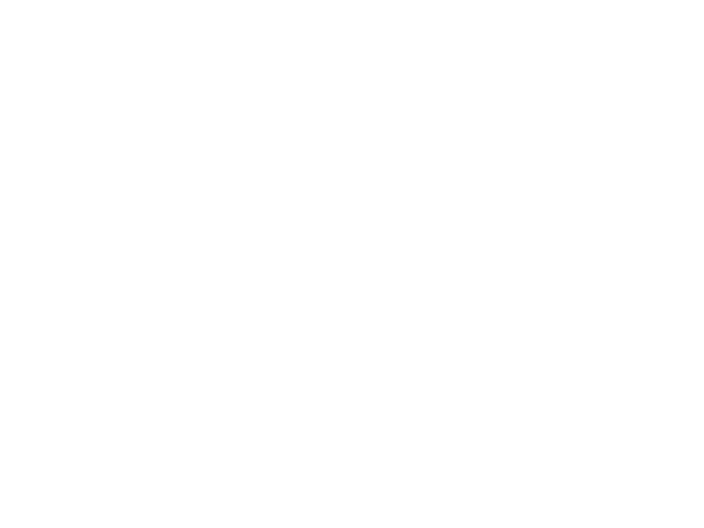

KeyError: 'tips'

In [9]:
print('< 시리즈로 히스토그램 그리기 >')
ax1 = plt.subplots()  # 틀만들기
ax1 = tips['total_bill'].plot.hist()
    # 이 시리즈로        히스토그램 그리겠다!
print('------------------------------------------------------------------------------------------------')

print('< 2개의 시리즈로 히스토그램 그리기 >')
fig, ax2 = plt.subplots()
ax2 = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax2)  # alpha: 투명도
print('------------------------------------------------------------------------------------------------')

print('< 밀집도 그리기 >')
ax3 = plt.subplots()
ax3 = tips['tips'].plot.kde()
print('------------------------------------------------------------------------------------------------')

print('< 산점도 그리기 >')
fig, ax4 = plt.subplots()
ax4 = tips.plot.scatter(x='total_bill', y='tip', ax=ax4)
print('------------------------------------------------------------------------------------------------')

print('< 육각그래프 그리기 >')
fig, ax5 = plt.subplots()
ax5 = tips.plot.hexbin(x='total_bill', y='tip', ax=ax5, gridsize=10)
print('------------------------------------------------------------------------------------------------')

print('< 박스그래프 그리기 >')
fig, ax6 = plt.subplots()
ax6 = tips.plot.box(ax=ax6)
print('------------------------------------------------------------------------------------------------')
